# eda003

In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

## データセットの読み込み

In [14]:
input_path = Path("../input")

train_df = pd.read_parquet(input_path / "train.parquet")
test_df = pd.read_parquet(input_path / "test.parquet")

## EDA

datetime(日時)：日付 + 時間(1時間ごとに1data)\
season(季節)：1 = 春, 2 = 夏, 3 = 秋, 4 = 冬\
holiday(祝日)：0 = 祝日ではない, 1 = 祝日\
workingday(労働日)：0 = 休日または休暇, 1 = 労働日\
weather(天気)：\
1: 快晴, 雲が少ない, 部分的に曇り, 部分的に曇り\
2：霧＋曇り、霧＋雲切れ、霧＋雲少、霧\
3: 小雪、小雨+雷雨+雲が散らばる、小雨+雲が散らばる\
4：大雨＋氷霰＋雷雨＋霧、雪＋霧\
temp(気温)：摂氏温度\
atemp(体感気温)：摂氏の感じる温度\
humidity(湿度)：相対湿度\
windspeed(風速)：風速\
casual(非登録ユーザーの利用数)：非登録ユーザーの利用数\
registered(登録ユーザーの利用数)：登録ユーザーの利用数\
count(総利用数)：総利用数


In [16]:
datetime = pd.to_datetime(train_df["datetime"])

train_df["year"] = datetime.dt.year
train_df["month"] = datetime.dt.month
train_df["day"] = datetime.dt.day
train_df["hour"] = datetime.dt.hour
train_df["dayofweek"] = datetime.dt.day_name()


In [17]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,Wednesday


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int32  
 13  month       10886 non-null  int32  
 14  day         10886 non-null  int32  
 15  hour        10886 non-null  int32  
 16  dayofweek   10886 non-null  object 
dtypes: float64(3), int32(4), int64(8), object(2)
memory usage: 1.2+ MB


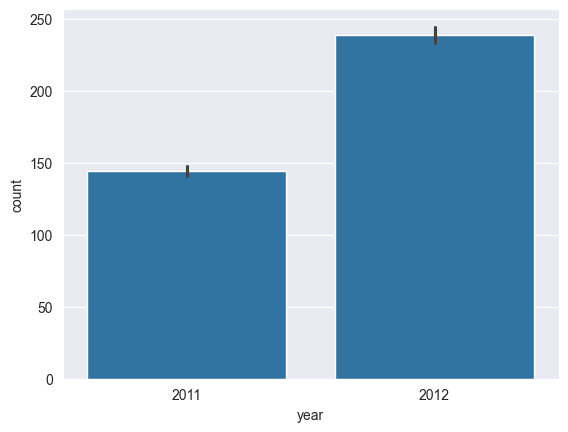

In [20]:
sns.barplot(x="year", y="count", data=train_df)
plt.show()

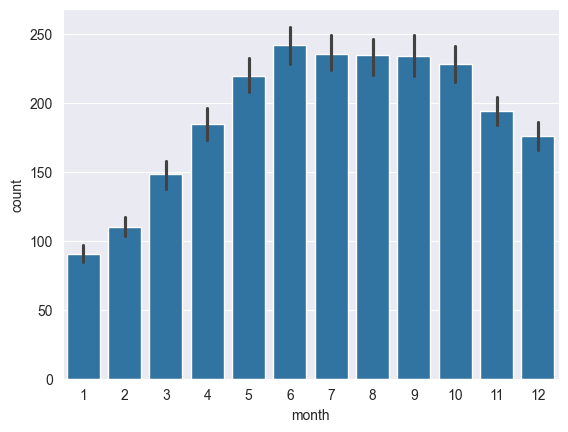

In [22]:
sns.barplot(x="month", y="count", data=train_df)
plt.show()

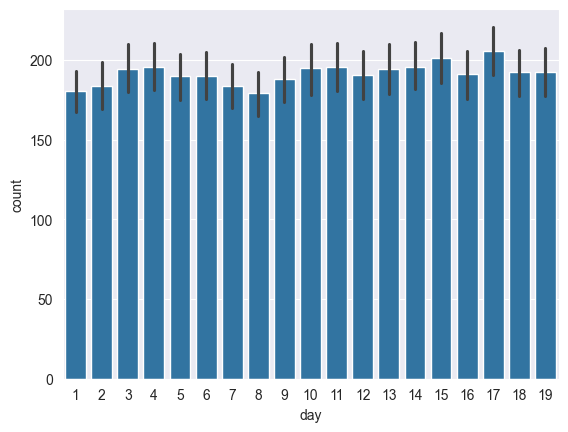

In [23]:
sns.barplot(x="day", y="count", data=train_df)
plt.show()

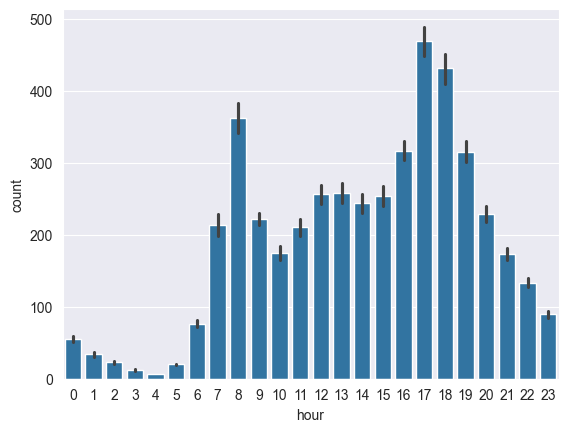

In [24]:
sns.barplot(x="hour", y="count", data=train_df)
plt.show()

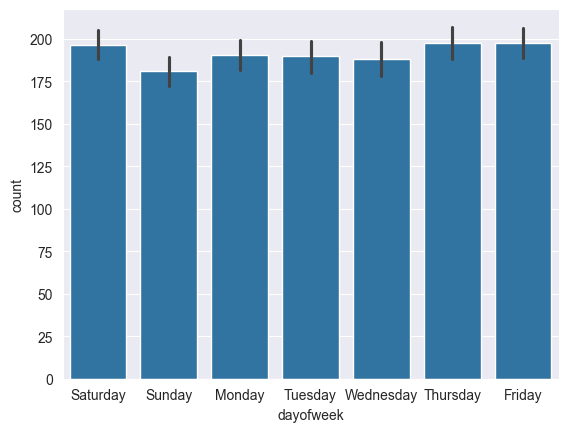

In [25]:
sns.barplot(x="dayofweek", y="count", data=train_df)
plt.show()

日曜日の自転車レンタル数が少ないのは驚き。\
ただ、あまり曜日ごとの傾向はなさそう。

時間ごとの自転車レンタル数は、朝と夕方に多い傾向がある。\
これは通勤時間帯に多いということか。

日ごとの傾向はなさそう。

月ごとの傾向は、5月から10月にかけて多くなっている。\
これは季節的なものか。
seasonを見る際にここは確かめたほうがよさそう。